# Readme

In [1]:
import pandas as pd

# 读取训练集和测试集
train_df = pd.read_csv('./data4_3/train.csv')  
test_df = pd.read_csv('./data4_3/test.csv')

print(train_df.head())
# print(train_df.tail())

print(f"训练集形状: {train_df.shape}")  #
print(f"测试集形状: {test_df.shape}\n")  #

print("特征列名: \n", train_df.columns.tolist()) #

print(train_df.info())  # info方法查看类型和缺失值
#print(test_df.info())

  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True  
训练

### 使用*豆包*解释数据,方便后续合理地填充空余值并进行编码来特征化
PassengerId：乘客唯一标识符，用于区分不同乘客

HomePlanet：乘客的出发星球，可能的值包括 "Earth"（地球）、"Mars"（火星）、"Europa"（木卫二）等

CryoSleep：是否进入休眠状态（布尔值或字符串），如果为 True 表示乘客在旅途中处于冷冻休眠状态

Cabin：客舱编号，格式通常为 "甲板 / 舱室号 / 侧面"（如 "B/0/P" 表示 B 甲板、0 号舱、左侧）

Destination：目的地星球，乘客计划到达的星球

Age：乘客年龄

VIP：是否为 VIP 乘客（布尔值或字符串），VIP 乘客可能享受特殊服务

RoomService：客舱服务消费金额

FoodCourt：美食广场消费金额

ShoppingMall：购物中心消费金额

Spa：水疗中心消费金额

VRDeck：VR 娱乐设施消费金额

Name：乘客姓名

Transported：是否被成功传送（目标预测变量），表示乘客是否成功到达目的地

In [ ]:
import numpy as np
from scipy import stats
num_cols = train_df.select_dtypes(include=[np.number]).columns

for col in num_cols: #去除极端值
    for i in range(len(train_df[col])):
        if train_df[col][i] > 4*train_df[col].std():
            train_df[col][i] = train_df[col].mean()
            
#注意到Cabin是组合的数据,需要进行拆分
train_df[['Cabin_Deck', 'Cabin_Number', 'Cabin_Side']] = train_df['Cabin'].str.split('/', expand=True)
test_df[['Cabin_Deck', 'Cabin_Number', 'Cabin_Side']] = test_df['Cabin'].str.split('/', expand=True)


C:\Users\17396\AppData\Local\Temp\ipykernel_45156\2323394756.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  train_df[col][i] = train_df[col].mean()
C:\Users\17396\AppData\Local\Temp\ipykernel_45156\2323394756.py:8: SettingWithCopyWarnin

In [ ]:
# 对数值列进行统计描述

print(train_df.isnull().sum())
print(train_df.describe())  

non_num_cols = train_df.select_dtypes(include=['object'])#筛选非数值布尔列

print(non_num_cols.count())
non_num_cols = non_num_cols.columns.tolist()

for col in non_num_cols:
    print(f"===== 特征：{col} =====")
    
    # 获取唯一类别
    unique_categories = train_df[col].unique()
    print(f"唯一类别（共{len(unique_categories)}种）：{unique_categories}")

    # 获取每个类别的出现次数排除缺失值，按降序排序
    value_counts = train_df[col].value_counts(dropna=False)  # dropna=False  包含缺失值
    print("类别出现次数：")
    print(value_counts)
    print("\n" + "-"*50 + "\n")  

# 按逻辑填补缺失值
# ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported']
train_df['HomePlanet'] = train_df['HomePlanet'].fillna(train_df['HomePlanet'].mode()[0])#填众数
train_df['CryoSleep'] = train_df['CryoSleep'].fillna(train_df['CryoSleep'].mode()[0])#填众数
train_df['Cabin_Deck'] = train_df['Cabin_Deck'].fillna(train_df['Cabin_Deck'].mode()[0])#填众数
train_df['Cabin_Number'] = train_df['Cabin_Number'].str[1].fillna(train_df['Cabin_Number'].mode()[0])#填众数
train_df['Cabin_Side'] = train_df['Cabin_Side'].str[2].fillna(train_df['Cabin_Side'].mode()[0])#填众数
train_df['Destination'] = train_df['Destination'].fillna(train_df['Destination'].mode()[0])
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())#填中位数
train_df['VIP'] = train_df['VIP'].fillna(train_df['VIP'].mode()[0])#填众数
train_df['RoomService'] = train_df['RoomService'].fillna(train_df['RoomService'].mean())#平均
train_df['FoodCourt'] = train_df['FoodCourt'].fillna(train_df['FoodCourt'].mean())#平均
train_df['ShoppingMall'] = train_df['ShoppingMall'].fillna(train_df['ShoppingMall'].mean())#平均
train_df['Spa'] = train_df['Spa'].fillna(train_df['Spa'].mean())#平均
train_df['VRDeck'] = train_df['VRDeck'].fillna(train_df['VRDeck'].mean())#平均
train_df['Name'] = train_df['Name'].fillna("somebody")


test_df['HomePlanet'] = test_df['HomePlanet'].fillna(test_df['HomePlanet'].mode()[0])#填众数
test_df['CryoSleep'] = test_df['CryoSleep'].fillna(test_df['CryoSleep'].mode()[0])#填众数
test_df['Cabin_Deck'] = test_df['Cabin_Deck'].fillna(test_df['Cabin_Deck'].mode()[0])#填众数
test_df['Cabin_Number'] = test_df['Cabin_Number'].str[1].fillna(test_df['Cabin_Number'].mode()[0])#填众数
test_df['Cabin_Side'] = test_df['Cabin_Side'].str[2].fillna(test_df['Cabin_Side'].mode()[0])#填众数
test_df['Destination'] = test_df['Destination'].fillna(test_df['Destination'].mode()[0])
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())#填中位数
test_df['VIP'] = test_df['VIP'].fillna(test_df['VIP'].mode()[0])#填众数
test_df['RoomService'] = test_df['RoomService'].fillna(test_df['RoomService'].mean())#平均
test_df['FoodCourt'] = test_df['FoodCourt'].fillna(test_df['FoodCourt'].mean())#平均
test_df['ShoppingMall'] = test_df['ShoppingMall'].fillna(test_df['ShoppingMall'].mean())#平均
test_df['Spa'] = test_df['Spa'].fillna(test_df['Spa'].mean())#平均
test_df['VRDeck'] = test_df['VRDeck'].fillna(test_df['VRDeck'].mean())#平均
test_df['Name'] = test_df['Name'].fillna("somebody")

print(train_df.isnull().sum())#检查是否填补完全

# 注：mode() 返回 Series，取 [0] 获取第一个众数

PassengerId       0
HomePlanet      197
CryoSleep       210
Cabin           198
Destination     178
Age             178
VIP             201
RoomService     180
FoodCourt       182
ShoppingMall    201
Spa             178
VRDeck          185
Name            193
Transported       0
Cabin_Deck      198
Cabin_Number    198
Cabin_Side      198
dtype: int64
               Age  RoomService    FoodCourt  ShoppingMall          Spa  \
count  8367.000000  8365.000000  8363.000000   8344.000000  8367.000000   
mean     26.612851   150.097715   247.654963    124.904062   178.167271   
std      11.740048   359.751106   682.557017    313.495325   481.886611   
min       0.000000     0.000000     0.000000      0.000000     0.000000   
25%      19.000000     0.000000     0.000000      0.000000     0.000000   
50%      26.899844     0.000000     0.000000      0.000000     0.000000   
75%      34.000000    47.000000    74.500000     28.000000    61.000000   
max      58.000000  2508.000000  6138.000000   

C:\Users\17396\AppData\Local\Temp\ipykernel_45156\915003718.py:26: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['CryoSleep'] = train_df['CryoSleep'].fillna(train_df['CryoSleep'].mode()[0])#填众数
C:\Users\17396\AppData\Local\Temp\ipykernel_45156\915003718.py:32: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['VIP'] = train_df['VIP'].fillna(train_df['VIP'].mode()[0])#填众数
C:\Users\17396\AppData\Local\Temp\ipykernel_45156\915003718.py:42: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change i

In [ ]:
columns_to_drop = ['Name','PassengerId','Cabin']
# 剔除指定列
train_df = train_df.drop(columns=columns_to_drop, errors='ignore')
test_df = test_df.drop(columns=columns_to_drop, errors='ignore')

# 获取剩余的object类型列,进行独热编码
object_columns = train_df.select_dtypes(include=['object']).columns.tolist()

train_df = pd.get_dummies(train_df, columns=object_columns)
# train_df = train_df[col for col in columns.map({True: 1, False: 0})]
test_df = pd.get_dummies(test_df, columns=object_columns)

for col in train_df.columns:
    if col in test_df.columns and train_df[col].dtype == 'bool':
        train_df[col] = train_df[col].map({True: 1, False: 0})
    else:
        pass


In [5]:
print(train_df.head(5))#看看结果

   CryoSleep   Age  VIP  RoomService  FoodCourt  ShoppingMall          Spa  \
0          0  39.0    0          0.0        0.0           0.0     0.000000   
1          0  24.0    0        109.0        9.0          25.0   549.000000   
2          0  58.0    1         43.0     3576.0           0.0   313.439106   
3          0  33.0    0          0.0     1283.0         371.0  3329.000000   
4          0  16.0    0        303.0       70.0         151.0   565.000000   

   VRDeck  Transported  HomePlanet_Earth  ...  Cabin_Number_2  Cabin_Number_3  \
0     0.0            0                 0  ...           False               0   
1    44.0            1                 1  ...           False               0   
2    49.0            0                 0  ...           False               0   
3   193.0            0                 0  ...           False               0   
4     2.0            1                 1  ...           False               0   

   Cabin_Number_4  Cabin_Number_5  Cabin_Num

特征数据形状: (8545, 29)
目标变量形状: (8545,)

前5行特征数据:
[[3.90000000e+01 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [2.40000000e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  9.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  1.09000000e+02 2.50000000e+01 5.49000000e+02 0.00000000e+00
  4.40000000e+01]
 [5.80000000e+01 1.00000000e+00 0.00000000e+00 0.00

d:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25439 (\N{CJK UNIFIED IDEOGRAPH-635F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22833 (\N{CJK UNIFIED IDEOGRAPH-5931}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35757 (\N{CJK UNIFIED IDEOGRAPH-8BAD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32451 (\N{CJK UNIFIED IDEOGRAPH-7EC3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\anaconda\Lib\site

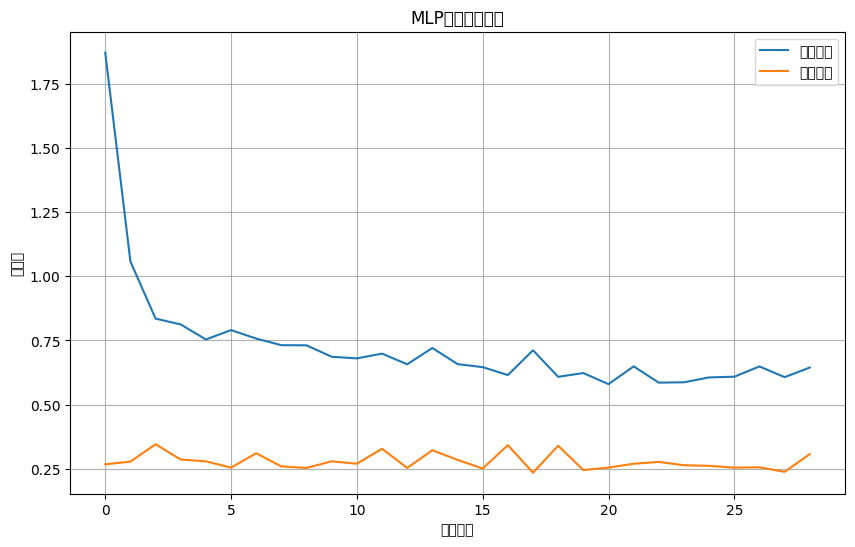

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier



# 超参数设置
lr = 0.0001
epoch = 50
batch = 64

# 转换布尔类型列为0和1
for col in train_df.columns:
    if train_df[col].dtype == bool:
        train_df[col] = train_df[col].astype(int)

for col in test_df.columns:
    if test_df[col].dtype == bool:
        test_df[col] = test_df[col].astype(int)

feature_cols = [col for col in train_df.columns if col not in ['Transported']]

# 对齐训练集和测试集的特征列
common_features = list(set(feature_cols) & set(test_df.columns))
common_features.sort()  # 保持一致的顺序


X_train = train_df[common_features].to_numpy()  # 特征数据
train_df_ = pd.read_csv('./data4_3/train.csv')  
test_df_ = pd.read_csv('./data4_3/test.csv')#读取测试正确集
y_train = train_df_['Transported'].to_numpy().ravel()  # 目标变量，转为一维数组

X_test = test_df[common_features].to_numpy()  # 特征数据
y_test = test_df_['Transported'].to_numpy().ravel()  # 目标变量，转为一维数组

print("特征数据形状:", X_train.shape)
print("目标变量形状:", y_train.shape)
print("\n前5行特征数据:")
print(X_train[:5])
print("\n前5行目标变量:")
print(y_train[:5])

# 定义MLP模型
mlp = MLPClassifier(
    hidden_layer_sizes=(128, 256),  
    activation='relu',              # 使用ReLU激活函数
    solver='adam',                  # Adam优化器
    alpha=0.001,                    # L2正则化参数
    batch_size=batch,               # 批次大小
    learning_rate='constant',       # 固定学习率
    learning_rate_init=lr,          # 初始学习率
    max_iter=epoch,                 # 最大迭代次数
    shuffle=True,                   # 每次迭代前打乱数据
    random_state=42,                # 随机种子
    verbose=True,                   # 训练过程中打印日志
    early_stopping=True,            # 启用早停策略
    validation_fraction=0.1,        # 10%的训练数据作为验证集
    tol=1e-4,                       # 早停的容差
    n_iter_no_change=10             # 10轮迭代无改善则停止
)

# 训练模型
print("\n训练MLP分类器...")
mlp.fit(X_train, y_train)

# 模型评估
print("\n模型评估:")
y_pred = mlp.predict(X_test)
print(y_pred)
y_pred_proba = mlp.predict_proba(X_test)[:, 1]  # 正类的预测概率

print(f"测试集准确率: {accuracy_score(y_test, y_pred):.4f}")
print("\n分类报告:")
print(classification_report(y_test, y_pred))
print("\n混淆矩阵:")
print(confusion_matrix(y_test, y_pred))

# 绘制训练损失曲线
plt.figure(figsize=(10, 6))
plt.plot(mlp.loss_curve_, label='训练损失')
if hasattr(mlp, 'validation_scores_'):
    plt.plot(1 - np.array(mlp.validation_scores_), label='验证损失')
plt.title('MLP训练损失曲线')
plt.xlabel('迭代次数')
plt.ylabel('损失值')
plt.legend()
plt.grid(True)
plt.show()


### 可视化结果,其中向ai询问了如何可视化结果的plt等库的api

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# 计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)
TP, TN, FP, FN = 0, 0, 0, 0

for i in range(len(y_test)):
    x = y_test[i]
    j = y_pred[i]
    
    if x == j:
        if x == True:
            TP += 1
        else:
            TN += 1
    else:
        if x == True:
            FN += 1
        else:
            FP += 1
print(f"TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")
print(y_test.shape)
print(y_pred.shape)
# 计算评估指标
# 二分类使用默认参数，多分类使用macro平均
is_binary = len(np.unique(y_test)) == 2

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary' if is_binary else 'macro')
recall = recall_score(y_test, y_pred, average='binary' if is_binary else 'macro')
f1 = f1_score(y_test, y_pred, average='binary' if is_binary else 'macro')

# 打印指标
# 可视化混淆矩阵
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels='T' if 'F' else np.unique(y_test),
            yticklabels='T' if 'F' else np.unique(y_test))
plt.xlabel('预测标签')
plt.ylabel('真实标签')
plt.title('混淆矩阵 (Confusion Matrix)')
plt.show()
print(f"混淆矩阵: {cm}")
print(f"准确率 (Accuracy): {accuracy:.4f}")
print(f"精确率 (Precision): {precision:.4f}")
print(f"召回率 (Recall): {recall:.4f}")
print(f"F1分数 (F1-score): {f1:.4f}")





NameError: name 'y_test' is not defined